# Beispiel: Physik - Kinematik

Author: D.H. Pahr, Datum: 12.08.2020


## Flugbahn eines Projektils

In diesem Beispiel wird die Flugbahn eines Projektiles untersucht. Das folgende Bild zeigt eine schematische Skizze. Das Projektil (schwarzer Punkt) wird mit der Geschwindigkeit $v_0$ unter einem Winkel $\theta$ abgeschossen.

<img src="Jupyter1_Beispiel1.png" alt="Drawing" style="width: 250px;"/>

**Gegeben**:

* Anfangsgeschwindigkeit $v_0 = 20 \frac{\mathrm{m}}{\mathrm{s}}$
* Abschusswinkel $\theta = 15, 30, 45, 60, 75 ^\circ$
* Erdbeschleunigung $g = 9.81 \frac{\mathrm{m}}{\mathrm{s}^2}$ (entlang $x_2$)

**Gesucht**:

* Wertetabelle der Höhe $h(t)=x_2(t)$ über der Zeit für $\theta=45$° mit 10 Einträgen.
* Flugbahnen für den jeweiligen Abschusswinkel in Form eines xy-Plots (Zeitdauer 3s).
* Animierte Flugbahn für $\theta=45$°.

### Theoretischer Hintergrund

Die Flugbahn eine Punktes wird mittels eines Postionsvektors $\vec x(t)$ beschrieben. 

<img src="Jupyter1_Beispiel1a.png" alt="Drawing" style="width: 250px;"/>

Der Geschwindigkeitsvektor $\vec v(t)$ berechnet sich aus der zeitlichen Ableitung der Position (beides Funktionen der Zeit $t$) d.h.:

$$ \vec v(t) = \frac{\partial \vec x(t)}{\partial t} $$

und der Beschleunigungsvektor $\vec a(t)$ wir berechnet aus der Geschwindigkeitsänderung:

$$ \vec a(t) = \frac{\partial \vec v(t)}{\partial t} = \frac{\partial^2 \vec x(t)}{\partial t^2}.$$

Im vorliegend Beispiel ist die Beschleunigung konstant (Erdbeschleunigung in negativer $x_2$ Richtung) und somit zeitunabhängig: 

$$ \vec a(t) =  \vec a = \left( \begin{array}{c}
0 \\
-g \\
\end{array}\right) = \mathrm{const}. $$

Im Falle konstanter Beschleunigung folgt das Weg-Zeit Gesetz d.h. die Positions des Projektils
durch zweifache Integration dieser Differentialgleichung:


$$  \frac{\partial^2 \vec x(t)}{\partial t^2} = \vec a \qquad \Rightarrow \qquad \vec x(t) = \vec x_0 + \vec v_0 + \vec a  \frac{t^2}{2}$$


mit der Anfangsposition 

$$\vec x_0 = \left( \begin{array}{c}
0  \\
0  \\
\end{array}\right) $$ 

und der Anfangsgeschwindigkeit $\vec v_0$

$$\vec v_0 = \left( \begin{array}{c}
v_0 \cos(\theta)  \\
v_0 \sin(\theta)  \\
\end{array}\right).$$ 



## Numerische Umsetzung

### Gegeben:

In [1]:
import numpy as np

# Anfangsgeschwindigkeit [v0]=m/s
v0 = 20

# Erdbeschleunigung [g]=m/s2
g = 9.81

# Abschusswinkel [theta]=rad 
np_theta = np.array([15, 30, 45, 60, 75])*np.pi/180.

# Anfangsverschiebungsvektor [x0]=m
np_x0 = np.array([0, 0])

# Beschleunigungsvektor [a]=m/s2
np_a = np.array([0, -g])

### Hilfsfunktionen

In [2]:
### Anfangsgeschwindigkeitsvektor [v0]=m/s
def np_v0(v0, theta): 
    return np.array([v0*np.cos(theta), v0*np.sin(theta)])

In [3]:
### Positionsvector [x]=m
def np_x(t, theta, v0, g):
    return np_x0 + np_v0(v0, theta)*t + np_a*(t**2)/2.

### Wertetabelle $h(t)$ für  𝜃=45 °

In [4]:
# Vorgegebener Winkel
theta45=45*np.pi/180.

# Hilfsfunktion zur Berechnung der Hoehe
def h(t) :  
    return np_x(t, theta45, v0, g)[1]

# Zeit wenn Bodenkontakt erreicht wird d.h. h(t)=0 bei t>0!
from scipy import optimize
tmax45 = optimize.newton(h, 10)   # Nullstellensuche, Startwert 10s d.h. rechter Nulldurchgang

print(f"Bodenkontakt nach {tmax45:.3f} s")

Bodenkontakt nach 2.883 s


In [5]:
# Zeit von 0...tmax                           
np_t45 = np.linspace(0, tmax45, 10)     

print(np_t45)

[0.         0.32035645 0.64071291 0.96106936 1.28142581 1.60178227
 1.92213872 2.24249517 2.56285163 2.88320808]


In [6]:
# Wertetabelle
print("Zeit s  |   Weg m")
print("-----------------")
for t in np_t45: 
    print(f"{t:.3f}   | {h(t):7.3f}")

Zeit s  |   Weg m
-----------------
0.000   |   0.000
0.320   |   4.027
0.641   |   7.047
0.961   |   9.061
1.281   |  10.068
1.602   |  10.068
1.922   |   9.061
2.242   |   7.047
2.563   |   4.027
2.883   |  -0.000


### Plot der Flugbahnen

In [7]:
### betrachtete Zeitspanne 0-4sec 
np_t = np.linspace(0, 3, 20)
print(np_t)

[0.         0.15789474 0.31578947 0.47368421 0.63157895 0.78947368
 0.94736842 1.10526316 1.26315789 1.42105263 1.57894737 1.73684211
 1.89473684 2.05263158 2.21052632 2.36842105 2.52631579 2.68421053
 2.84210526 3.        ]


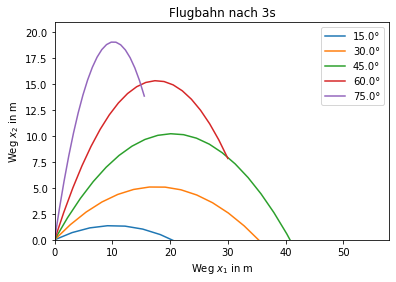

In [8]:
### Erzeugen und Plot der x1-x2 Daten 
import matplotlib.pyplot as plt

# Maximalwerte für Axen Limits
x1max=0; x2max=0

for theta in np_theta:   
    # Postitionen in 1 und 2
    np_x1 = np.zeros(len(np_t)) ; np_x2 = np.zeros(len(np_t))
    for i in range(len(np_t)):
        np_x1[i]=np_x(np_t[i], theta, v0, g)[0]
        np_x2[i]=np_x(np_t[i], theta, v0, g)[1]
        
        if np.max(np_x1) > x1max: x1max=np.max(np_x1)    
        if np.max(np_x2) > x2max: x2max=np.max(np_x2)    
            
    # ... Plots erstellen  
    plt.plot(np_x1, np_x2, label= f"{theta*180/np.pi:.1f}°")

# ... Achsenbeschriftung
plt.title('Flugbahn nach 3s')
plt.xlabel('Weg $x_1$ in m')
plt.ylabel('Weg $x_2$ in m')

# Min/Max Werte der Achsen veraendern
plt.axis([0, x1max, 0, x2max*1.1])

# Legende einfuegen
plt.legend() 


### Animierte Flugbahn

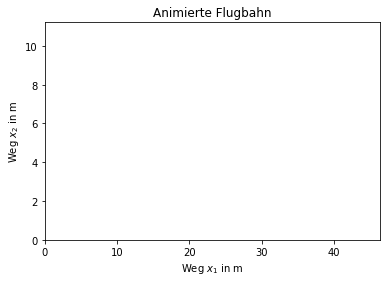

In [9]:
# Benoetigte Bibliotheken 
import matplotlib.animation

# Animationspunkte
n=30

# Zeit 
np_t = np.linspace(0, tmax45+tmax45/n, n)

# Wege in x1 und x2
np_x1 = np.zeros(len(np_t)); np_x2 = np.zeros(len(np_t))
for i in range(len(np_t)):
    np_x1[i]=np_x(np_t[i], theta45, v0, g)[0]
    np_x2[i]=np_x(np_t[i], theta45, v0, g)[1]

# Erzeugen eines leeren Plots
fig, ax = plt.subplots()

# Skalierung der Axen
ax.axis([0,np.max(np_x1)*1.1,0,np.max(np_x2)*1.1])
ax.set_title('Animierte Flugbahn')
ax.set_xlabel('Weg $x_1$ in m')
ax.set_ylabel('Weg $x_2$ in m')

# Leerer Linienplot 
flugbahn, = ax.plot([],[],"o")

In [10]:
# Animationsfunktion
def animate(i):
    flugbahn.set_data(np_x1[:i], np_x2[:i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(np_t))

In [11]:
# Animation anzeigen
from IPython.display import HTML
HTML(ani.to_jshtml())